In [1]:
# NA values removed and 0 values for localization column removed.

# preliminaries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

exome = pd.read_excel("HC-JSexomes_2_output_1percentExAC_Corrected.xlsx")
exome.head

<bound method NDFrame.head of                                     File Name Chromosome   Position  \
0      JS_8505_UG.recalSNPs_Indels_output.txt          1     957898   
1      JS_8505_UG.recalSNPs_Indels_output.txt          1     977133   
2                   8138Trio.final_output.txt          1     977406   
3                   8501Trio.final_output.txt          1     978668   
4                     8079-3.final_output.txt          1     981869   
5                   8084Trio.final_output.txt          1     981869   
6                   8138Trio.final_output.txt          1     981869   
7                     8168-3.final_output.txt          1     981869   
8                    8182Duo.final_output.txt          1     981869   
9                   8187Trio.final_output.txt          1     981869   
10                    8212-3.final_output.txt          1     981869   
11                    8212-4.final_output.txt          1     981869   
12                  8216Trio.final_output.txt  

In [2]:
exomeFiltered = exome.loc[:, ['GERP','CADD_PHRED_score', 'AB', 'P1_AltFreq', 'P2_AltFreq' ,'localization', 'js_cause']]

In [3]:
exome.shape

(24280, 41)

In [4]:
exomeTest = exomeFiltered.loc[:,['GERP','CADD_PHRED_score', 'AB', 'P1_AltFreq', 'P2_AltFreq']]

array([ 0.89745938,  0.99869461,  0.99937574,  0.99970461,  1.        ])

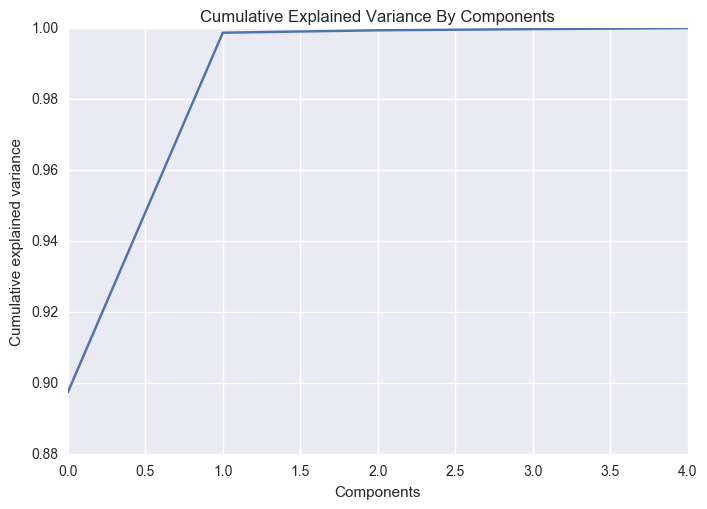

In [5]:
#PCA portion of the analysis
eigenVariant = PCA()
eigenVariant.fit(exomeTest)

plt.plot(np.cumsum(eigenVariant.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance By Components')
np.cumsum(eigenVariant.explained_variance_ratio_)

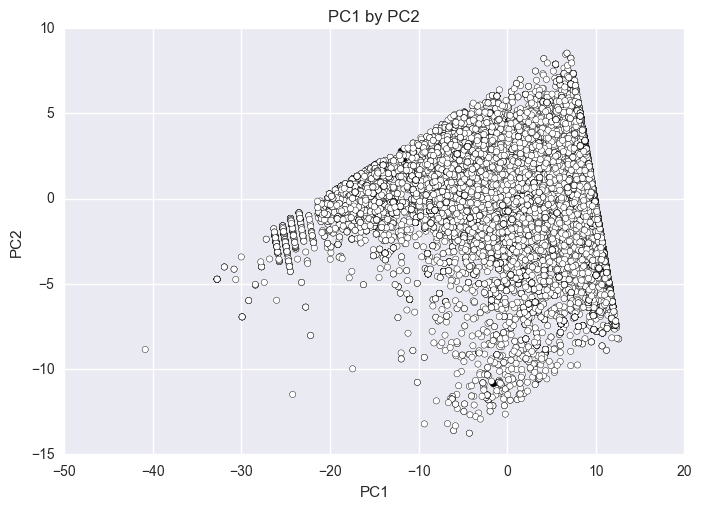

In [6]:
#PC plot colored by js_cause
variants_red = eigenVariant.transform(exomeTest)
plt.scatter(variants_red[:, 0].flatten(),variants_red[:, 1].flatten(), c=exome['js_cause'])
plt.title("PC1 by PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")

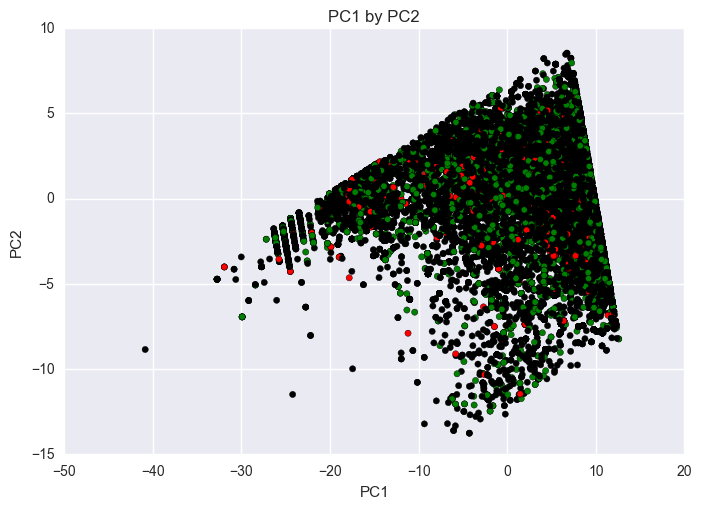

In [7]:
#PC plot colored by localization
variants_red = eigenVariant.transform(exomeTest)
exomeColor = exome['localization'].replace([1,2,3],['red','green','black'])
plt.scatter(variants_red[:, 0].flatten(),variants_red[:, 1].flatten(), c= exomeColor)
plt.title("PC1 by PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")

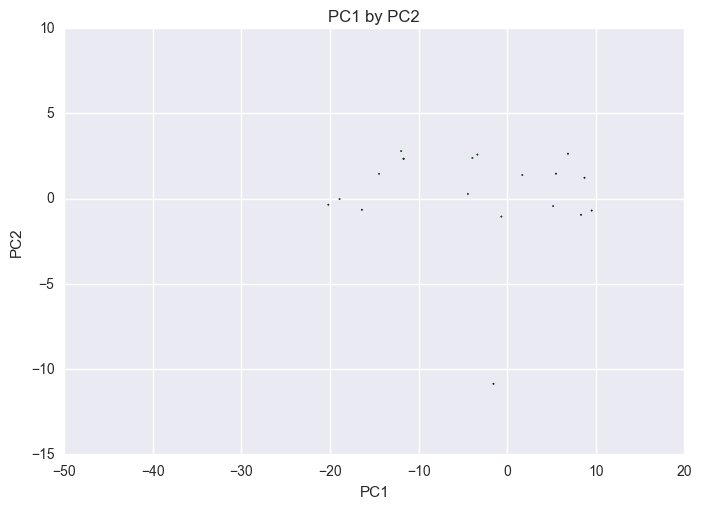

In [33]:
#PC plot with only JS causative variants. They are all clack
variants_red = eigenVariant.transform(exomeTest)
plt.scatter(variants_red[:, 0].flatten(),variants_red[:, 1].flatten(), exome['js_cause']==1, c=exomeColor)
plt.title("PC1 by PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")

[0 0 0 ..., 0 0 0]


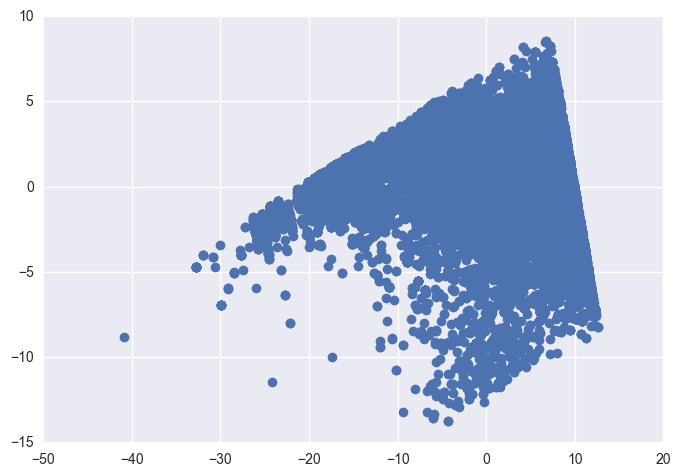

In [20]:
model = LinearDiscriminantAnalysis()

X = variants_red[:,[0,1]]
y = exome['js_cause']

model.fit(X, y)

predicted = model.predict(X)

print(predicted)

for JS in set(predicted):
    plt.plot(X[predicted==JS,0], X[predicted==JS,1], 'o')

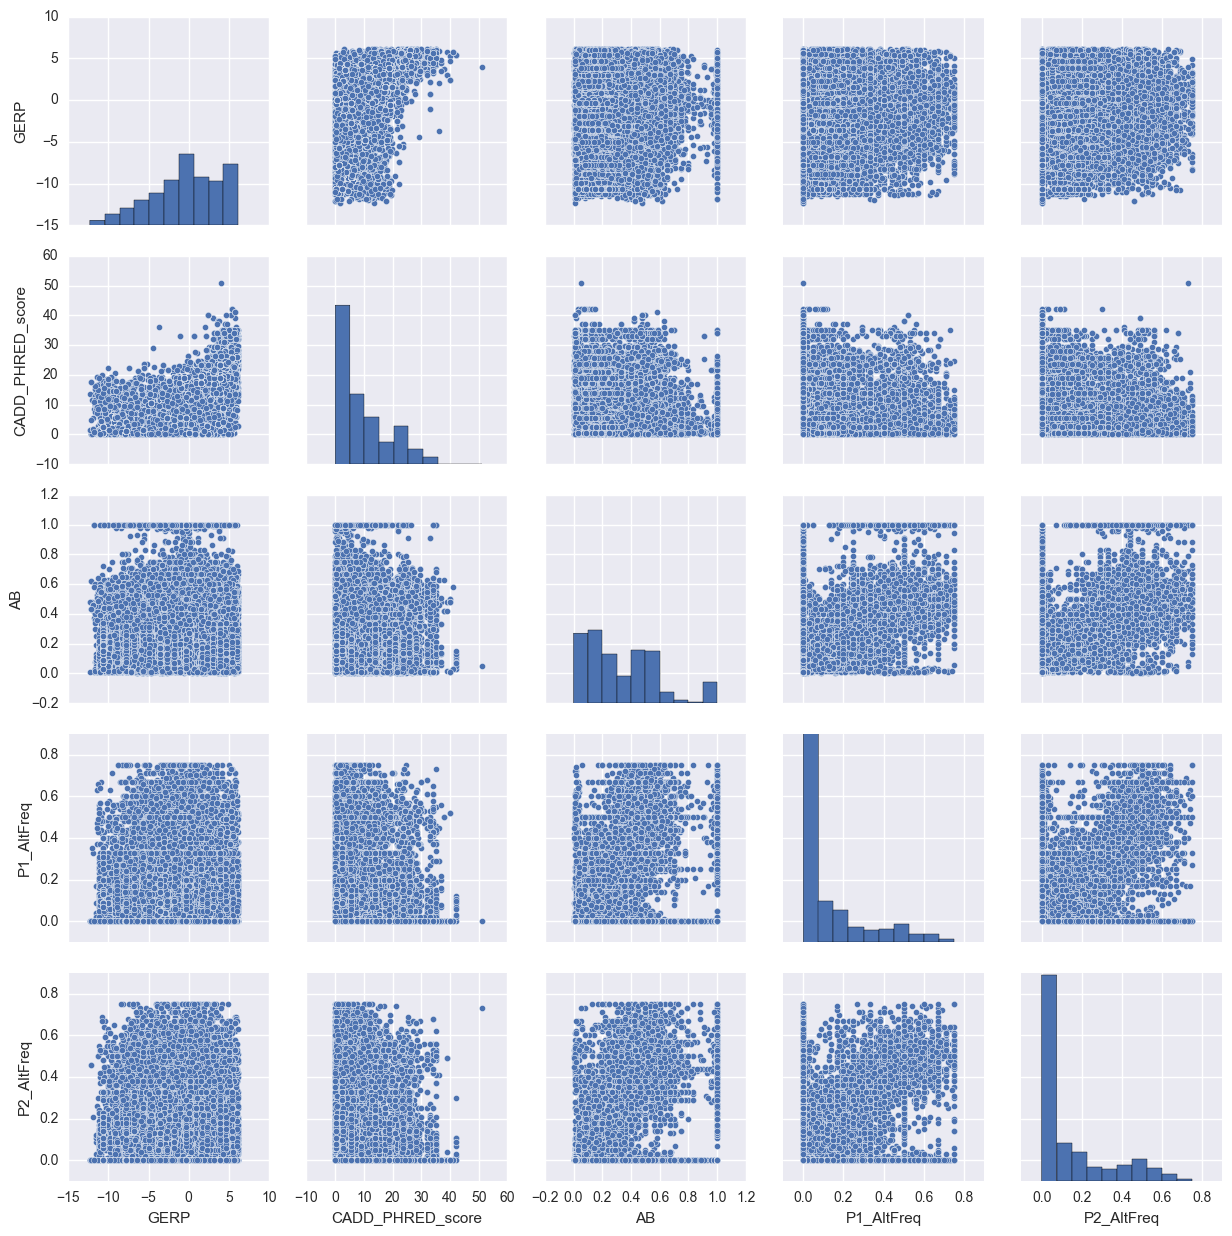

In [10]:
sns.pairplot(exomeTest)